<h1 align=center> Empirics of the Labour Theory of Value </h1>

In this notebook we shall be attempting to replicate the findings among some emperical economists of a correlation between labour values and industrial outputs; otherwise known as `the labour theory of value(LTV)`. 

This is a very dense (not to mention, controversial) topic and we may not be able to do it full justice within these pages.

<h2 align=center> Dataset </h2>
We are going to use input output tables relating to different countries to test the theory.
- <a href=https://www.ons.gov.uk/file?uri=/economy/nationalaccounts/supplyandusetables/datasets/ukinputoutputanalyticaltablesindustrybyindustry/current/nasu1719in.xlsx> UK IO Tables </a

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [2]:
# Load the xlsx file
workbook = openpyxl.load_workbook('./data/io_table_uk.xlsx')

# Access the specific sheet by name or index
sheet_name = 'IOT'
sheet = workbook[sheet_name]

# Read data from the sheet and store it in a list of lists
data = []
for row in sheet.iter_rows(values_only=True):
    data.append(row)

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Optionally, if you want to set the first row as column names, you can do:
# df = pd.DataFrame(data[1:], columns=data[0])

# Close the workbook
workbook.close()

## Exploration

In [3]:
df.shape

(139, 134)

### Renaming Columns

In [4]:
in_industries = df.iloc[:,1]
out_industries = df.iloc[4,:]

In [5]:
df.columns = out_industries

In [6]:
df.head(1)

4,None,Industry,"Crop And Animal Production, Hunting And Related Service Activities",Forestry And Logging,Fishing And Aquaculture,Mining Of Coal And Lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other Mining And Quarrying,Mining Support Service Activities,Processing and preserving of meat and production of meat products,...,None,None,None,None,None,None,None,None,None,None
0,2019 Input-Output Analytical Tables,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Labour Content
This is the monetary amount, `wages`, paid out to employees for each industry. It is called in the dataset `Compensation of employees`.

In [7]:
for item in in_industries:
    if 'Compensation of employees' == item:
        print('Wages found')

Wages found


In [8]:
wages = df[df.iloc[:,1] == 'Compensation of employees']
wages

4,None,Industry,"Crop And Animal Production, Hunting And Related Service Activities",Forestry And Logging,Fishing And Aquaculture,Mining Of Coal And Lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other Mining And Quarrying,Mining Support Service Activities,Processing and preserving of meat and production of meat products,...,None,None,None,None,None,None,None,None,None,None
115,D1,Compensation of employees,3658,506,388,80,2235,917,1130,3746,...,None,None,None,None,None,None,None,None,None,None


### Output per Industry

In [9]:
for item in in_industries:
    if 'Total output at basic prices' == item:
        print('Output found')

Output found


In [10]:
output = df[df.iloc[:,1] == 'Total output at basic prices']
output

4,None,Industry,"Crop And Animal Production, Hunting And Related Service Activities",Forestry And Logging,Fishing And Aquaculture,Mining Of Coal And Lignite,Extraction Of Crude Petroleum And Natural Gas & Mining Of Metal Ores,Other Mining And Quarrying,Mining Support Service Activities,Processing and preserving of meat and production of meat products,...,None,None,None,None,None,None,None,None,None,None
119,P1,Total output at basic prices,30872,1916,2183,366,29703,5901,5302,19967,...,None,None,None,None,None,None,None,None,None,None


#### Cleaning

In [11]:
wages = wages.iloc[:,2:]
wages.fillna(0, inplace=True)
wages = wages.values

C:\Users\USER\AppData\Local\Temp\ipykernel_16976\1207408889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wages.fillna(0, inplace=True)


In [12]:
output = output.iloc[:,2:]
output.fillna(0, inplace=True)
outputs = output.values

C:\Users\USER\AppData\Local\Temp\ipykernel_16976\4037850799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.fillna(0, inplace=True)


### Plotting

In [13]:
len(wages) == len(outputs)

True

In [14]:
wages.ndim
wages = wages.flatten()
wages.ndim

1

In [15]:
outputs.ndim
outputs = outputs.flatten()
outputs.ndim

1

<AxesSubplot:>

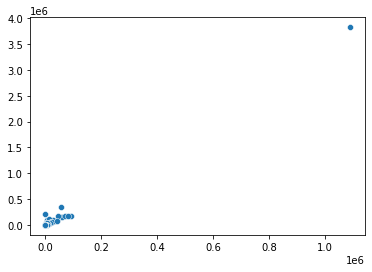

In [16]:
sns.scatterplot(x=wages, y=outputs)

### Outlier Problems

In [17]:
def remove_outliers_symmetric(x, y):

    # Calculate the IQR (Interquartile Range) for both arrays
    q1_x = np.percentile(x, 25)
    q3_x = np.percentile(x, 75)
    iqr_x = q3_x - q1_x

    q1_y = np.percentile(y, 25)
    q3_y = np.percentile(y, 75)
    iqr_y = q3_y - q1_y

    # Define the lower and upper bounds for outlier removal
    lower_bound_x = q1_x - 1.5 * iqr_x
    upper_bound_x = q3_x + 1.5 * iqr_x

    lower_bound_y = q1_y - 1.5 * iqr_y
    upper_bound_y = q3_y + 1.5 * iqr_y

    # Filter out the outliers for both arrays
    filtered_indices = (x >= lower_bound_x) & (x <= upper_bound_x) & (y >= lower_bound_y) & (y <= upper_bound_y)
    x_filtered = x[filtered_indices]
    y_filtered = y[filtered_indices]
    
    return x_filtered, y_filtered

In [18]:
wages_, outputs_ = remove_outliers_symmetric(wages, outputs)

### Correlation Coefficient and R Squared

In [19]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
x = wages_
y = outputs_

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(x, y)

r_squared = correlation_coefficient ** 2
print(f"R-squared (coefficient of determination): {r_squared}")

NameError: name 'r_squared' is not defined

In [ ]:
custom_message = f"Correlation Coefficient: {round(correlation_coefficient, 2)} \n \n R-squared: {round(r_squared, 2)}"

In [ ]:
# Now you can plot the filtered data
plt.figure(figsize=(8, 6))
plt.plot(wages_, outputs_, 'bo')
plt.legend(loc='upper right', title=custom_message)
plt.xlabel('Wages (Proxy for Labour Values)')
plt.ylabel('Industrial Output (In Money)')
plt.title('Correlation between Labour Values and Output')
plt.show()

<h2 align=center> Conclusion 1 </h2>

We have indeed idenfified a good correltion between labour values, represented here as wages, and industrial output, `r_squared = 0.78`

. These are good results in support of the LTV which states:
> The higher the labour value contained in commodities, the higher the price (to paraphrase)

<h3 align=center> Caveats </h3>
This is only a preliminary conclusion. There are plenty of other factors to take into account (such as the possibility spurious correlation). For now we only say that the relationship tracks well with what the theory says.